<a href="https://colab.research.google.com/github/Isaac-Gregory/Game-RL-CSCE-5214/blob/connect-four/Connect4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ideally I want the program to be able to be "refunctionable"

- If we need to change to a different UI (terminal to python GUI), then it is easily done
- We also need to decide how it can integrate with the RL model


**Remaining work**: Game Class

- Need to add functionality to actually make a move in the game
- Need to add the game loop to run the actual game
- Integration functions for RL model

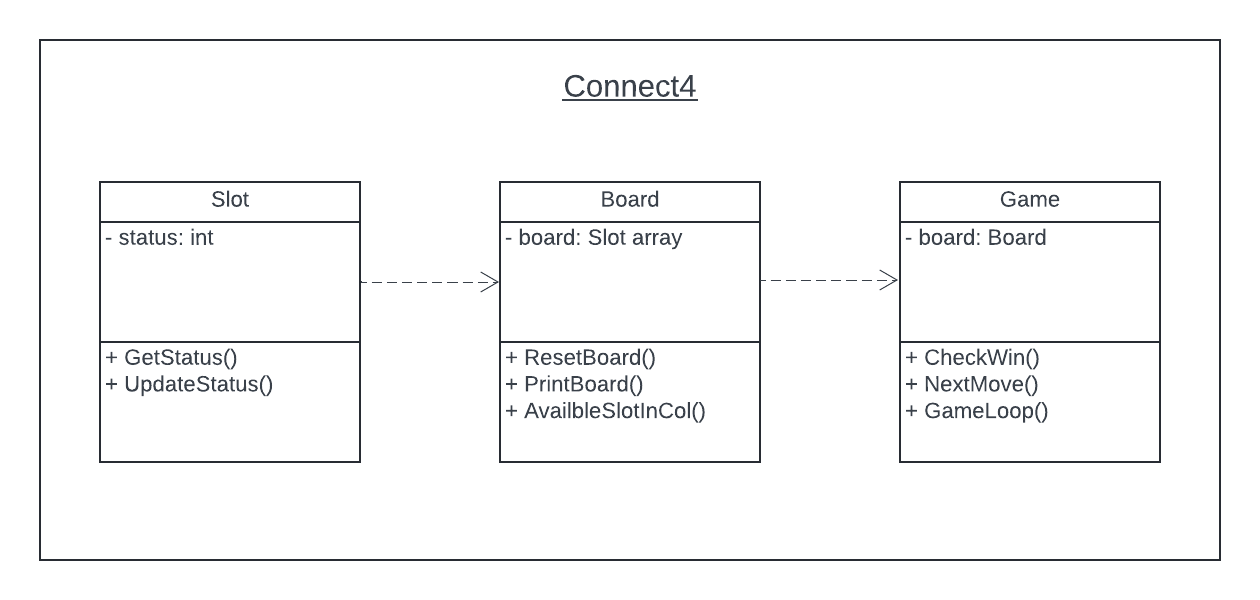

In [9]:
import numpy as np

In [10]:
class Slot:
  def __init__(self):
    self.status = ' '

  def UpdateStatus(self, status):
    self.status = status

  def GetStatus(self):
    return str(self.status)

  def __str__(self):
    return str(self.status)

In [11]:
class Board:

  # Creating board
  def __init__(self):
    self.ResetBoard()

  # Reporting on board
  def BoardInfo(self):
    print("Board Size: ", self.game_board.shape)
    print(self)

  # Printing out the board
  def __str__(self):
    board_str = ""
    shape = self.game_board.shape

    board_str += "-" * (shape[0] * 4 + 1) + "\n"
    for row in range(shape[1]-1, -1, -1):
      row_str = "| "
      for col in range(shape[0]):
        row_str += self.game_board[col][row].GetStatus() + " | "
      board_str += row_str + "\n"
    board_str += "-" * (shape[0] * 4 + 1)
    return board_str

  # Resetting board to default
  def ResetBoard(self):
    self.game_board = np.array([[Slot() for _ in range(6)] for _ in range(7)])

  # Finding the next available slot position for the given column
  def AvailableSlotInCol(self, col_index):
    for row in range(5, -1, -1):
      if self.game_board[col_index][row].GetStatus() != ' ':
        return row+1
    return None

In [12]:
class Connect4():
  def __init__(self):
    self.board = Board()

  def CheckWin(self, filled_position, team_id):
    # Hardcoding the seven possible directions
    # (Due to nature of connect4, there's no reason to check upwards)
    directions = [(1, 1), (-1, -1), (1, -1), (-1, 1), (1, 0), (-1, 0), (0, 1), (0, -1)]
    direction_values = [-1] * len(directions)

    # Checking in each direction
    for i, direction in enumerate(directions):
      # Setting up while loop to run
      curr_id = team_id

      # Looping through direction
      while curr_id == team_id:

        # Adding to direction
        direction_values[i] += 1
        # print(direction, direction_values[i], i)

        # Ending conditions:
        # 4 connected in this direction
        if direction_values[i] >= 3:
          return True
        # 4 connected between this and opposite directions
        # (Only valid after opposite direction is processed)
        elif (i % 2 != 0) and (direction_values[i] + direction_values[i-1] >= 3):
          return True

        # Checking if next directions are within matrix
        # (using direction_values as a counter for how far we've gone in that direction so far)
        next_x = filled_position[0]+direction[0]*(direction_values[i]+1)
        next_y = filled_position[1]+direction[1]*(direction_values[i]+1)
        if (next_x < 0) or (next_x >= self.board.game_board.shape[0]) or (next_y < 0) or (next_y >= self.board.game_board.shape[1]):
          break

        # Otherwise getting next status
        curr_id = self.board.game_board[next_x][next_y].GetStatus()

    # No 4-way connection was found in the given directions
    return False

  # NOTE: I think the following two are the final functions for the standard implementation of the game.
  #       Additional functions or functionality may be needed for allowing the model to control its side
  #       of the game.

  # This would be where the player selects their next move (could be combined with game loop)
  # def NextMove(self):

  # def GameLoop(self):


In [20]:
game = Connect4()

# Setup board as [column][row] due to nature of the game
# Feel free to change this around Austin, or just let me know and I can make the
# necessary changes

# Testing the win conditions
game.board.game_board[2][2].UpdateStatus('o')
# game.board.game_board[3][2].UpdateStatus('o')
game.board.game_board[4][2].UpdateStatus('o')
game.board.game_board[5][2].UpdateStatus('o')
game.board.game_board[6][2].UpdateStatus('o')
game.board.game_board[0][0].UpdateStatus('o')

position = (6, 2)
# game.board.game_board[position[0]][position[1]].UpdateStatus(' ')
game.board.BoardInfo()

print(game.CheckWin(position, game.board.game_board[position[0]][position[1]].GetStatus()))

Board Size:  (7, 6)
-----------------------------
|   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   | 
|   |   | o |   | o | o | o | 
|   |   |   |   |   |   |   | 
| o |   |   |   |   |   |   | 
-----------------------------
False
